# **EDA (exploratory data analysis)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("salario_data_cleaned.csv",index_col=0)
df.head()

,year,company,level,title,totalyearlycompensation,yearsofexperience,yearsatcompany,bonus,gender,Race,Education,city,country,es_faang
0,2017,Oracle,L3,Product Manager,127000,1.5,1.5,10000.0,Desconocido,Desconocido,Desconocido,Redwood City,United States,0
1,2017,eBay,SE 2,Software Engineer,100000,5.0,3.0,0.0,Desconocido,Desconocido,Desconocido,San Francisco,United States,0
2,2017,Amazon,L7,Product Manager,310000,8.0,0.0,0.0,Desconocido,Desconocido,Desconocido,Seattle,United States,1
3,2017,Apple,M1,Software Engineering Manager,372000,7.0,5.0,35000.0,Desconocido,Desconocido,Desconocido,Sunnyvale,United States,1
4,2017,Microsoft,60,Software Engineer,157000,5.0,3.0,0.0,Desconocido,Desconocido,Desconocido,Mountain View,United States,0


Nos vamos a focalizar en responder lo siguiente:

- Cuáles son los roles mejor pagos en promedio? Esto cambió durante la pandemia (2020 a 2021)?

- En qué rol hay más cantidad de personas trabajando? Evolucionó durante covid?

- Hay diferencia de salario entre hombres y mujeres en la industria tech?

- Qué empresas tienen más empleados?

- Qué empresas pagan más? Existe diferencia de salario entre FAANG y otras empresas?

- Evaluar correlación: educación-salario, años de experiencia-salario, etnia-salario, dmaid

**Separemos las columnas del dataframe en categoricas y numericas**

In [4]:
# Columnas Categoricas

cat_features = [column for column in df.columns if df[column].dtype=='O']
cat_features

['company', 'level', 'title', 'gender', 'Race', 'Education', 'city', 'country']

In [5]:
# Columnas Numéricas

num_features = [column for column in df.columns if df[column].dtype!='O']
num_features

['year',
 'totalyearlycompensation',
 'yearsofexperience',
 'yearsatcompany',
 'bonus',
 'es_faang']

**Genero graficos de barras para algunas columnas categoricas**

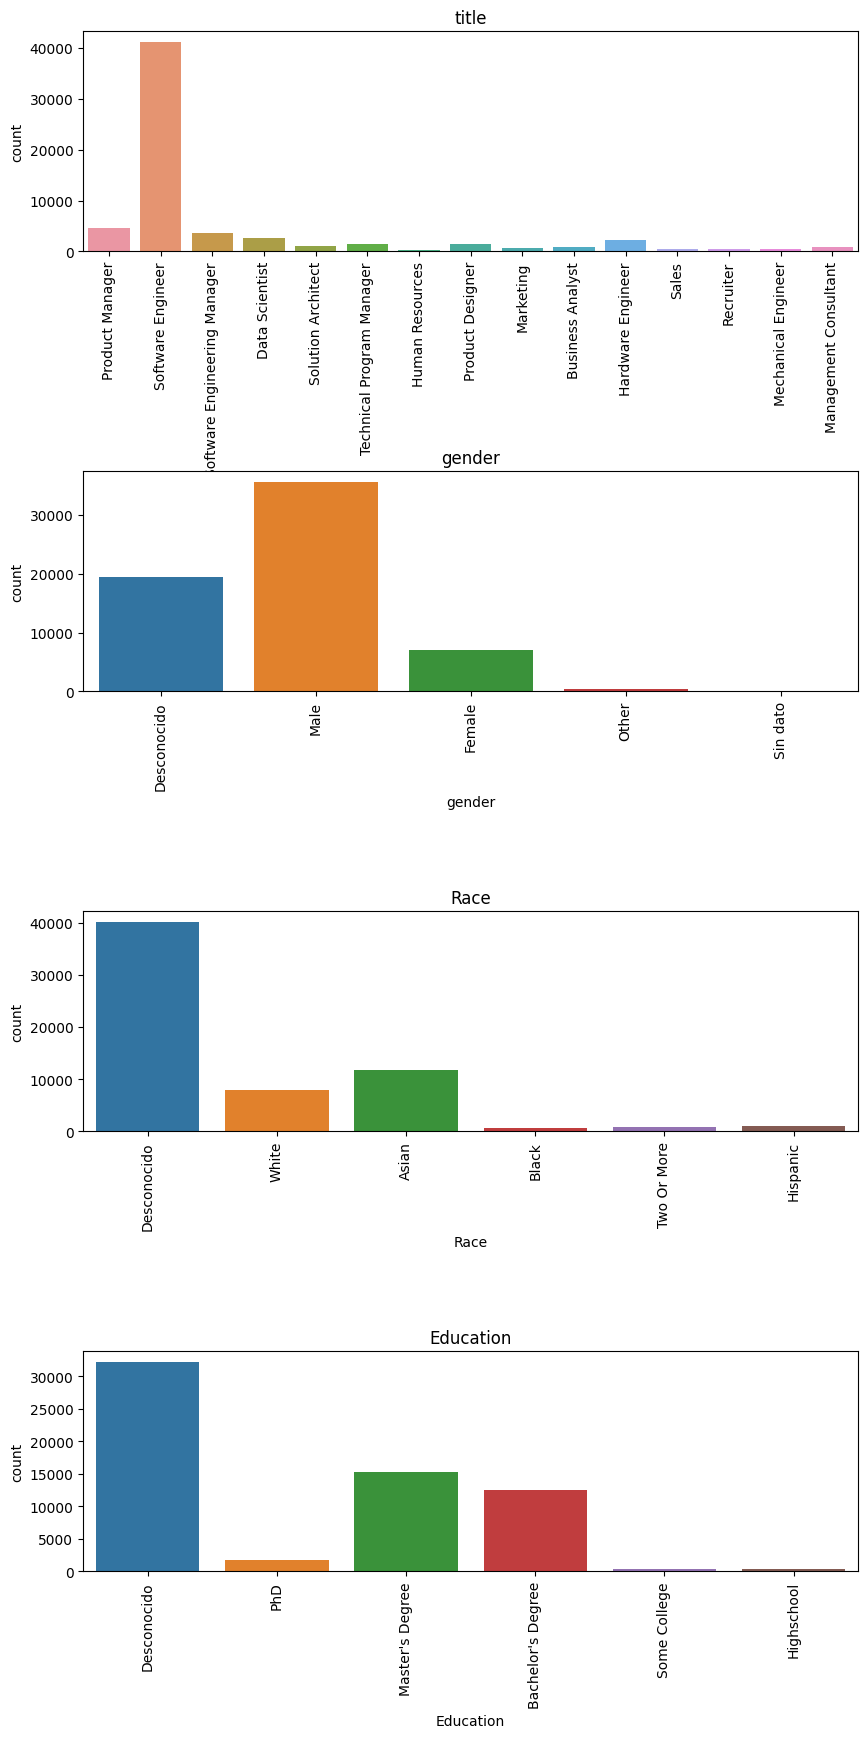

In [5]:
# Tomemos las variables categóricas y generemos gráficos de barras

col_cat = ['title', 'gender', 'Race', 'Education']

# Gráficos de barras de conteo
fig, ax = plt.subplots(nrows=len(col_cat), ncols=1, figsize=(10,20))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(col_cat):
  sns.countplot(x=col, data=df, ax=ax[i])
  
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=90)

### **Compensación monetaria anual por Rol**

In [19]:
# Tabla de salario promedio por Rol

df_salariosPorRol = df.groupby('title')['totalyearlycompensation'].mean().sort_values(ascending=False).round(2).to_frame()
df_salariosPorRol

,totalyearlycompensation
title,
Software Engineering Manager,354695.20
Product Manager,257962.64
Technical Program Manager,237315.67
Sales,214273.32
Hardware Engineer,213655.00
Solution Architect,212736.39
Product Designer,207937.04
Software Engineer,205440.34
Data Scientist,203831.58


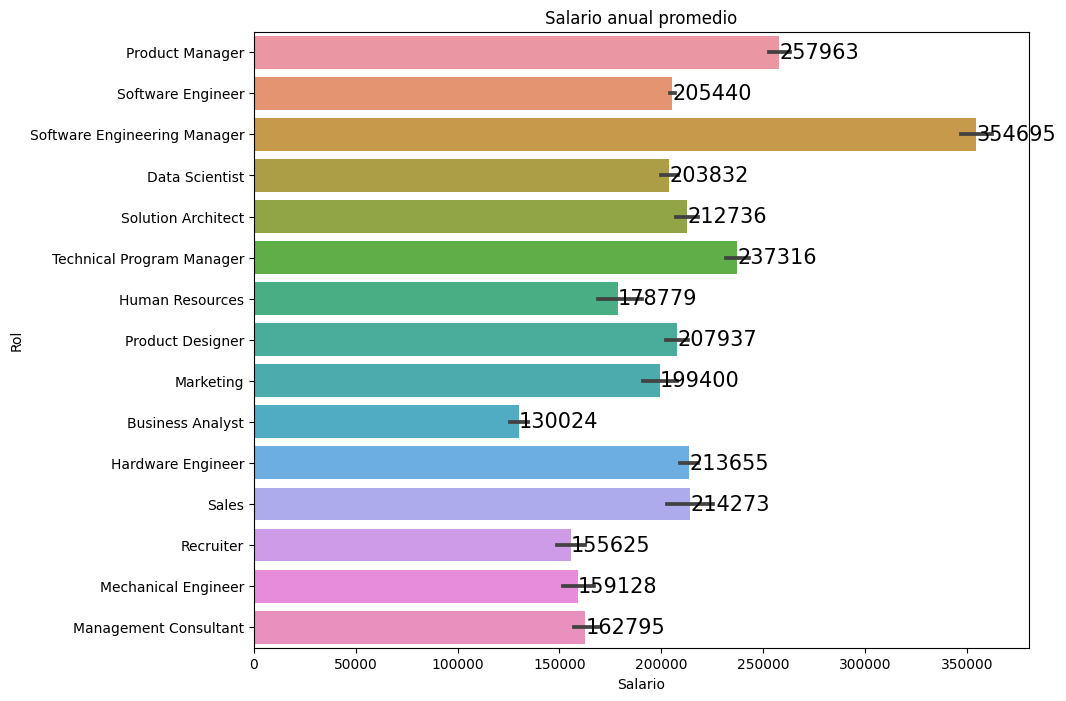

In [7]:
# Gráfico de salario promedio por rol desempeñado

plt.figure(figsize=(10,8))
ax = sns.barplot(data=df, x='totalyearlycompensation', y = 'title')

ax.set(xlabel='Salario', ylabel='Rol', title = 'Salario anual promedio')
plt.bar_label(ax.containers[0], size=15)
plt.tight_layout
plt.show()

**Graficamos la compensación anual por rol para los años 2020 y 2021** 

In [8]:
df['year'].unique()

array([2017, 2018, 2019, 2020, 2021], dtype=int64)

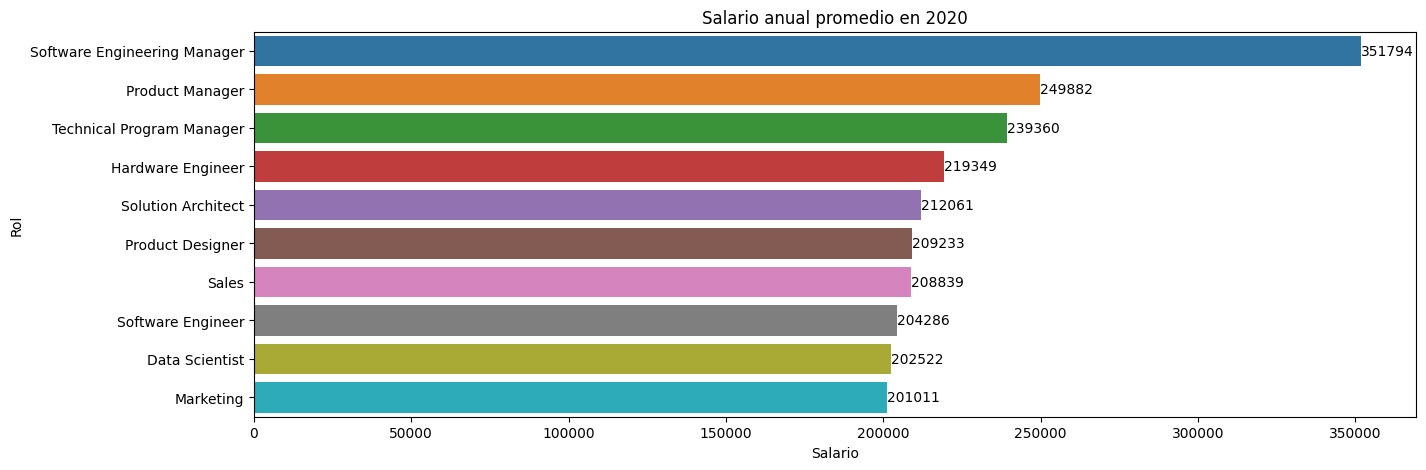

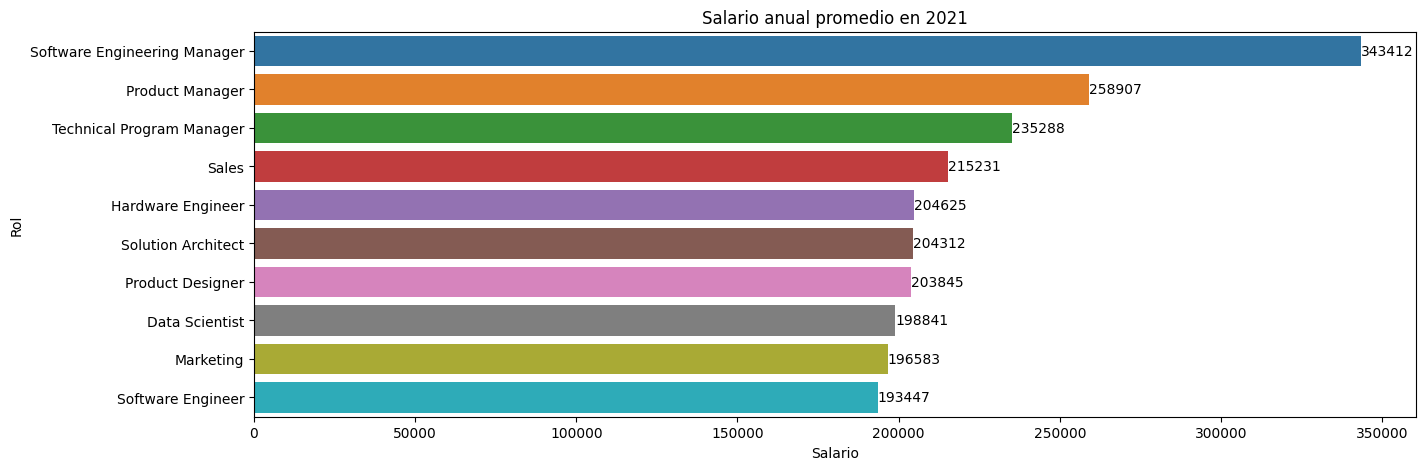

In [9]:
# Gráficos de compensación total anual para los diferentes roles en el 2020 y 2021

for year in [2020, 2021]:
    
    plt.figure(figsize=(15,5))
    ax = sns.barplot(
                    x = df[df['year']==year].groupby('title')['totalyearlycompensation'].mean().nlargest(10).values,
                    y = df[df['year']==year].groupby("title")['totalyearlycompensation'].mean().nlargest(10).index
    )
    ax.set(xlabel='Salario', ylabel='Rol', title = f'Salario anual promedio en {year}')
    plt.bar_label(ax.containers[0], size=10)
    plt.tight_layout
    plt.show()

*Observación: Software Engineering Manager es el rol mejor pagado. Por otro lado no se nota un cambio significativo en las compensaciones anuales por rol debido a la pandemia del periodo 2020-2021*

**Cantidad de Empleados por rol para 2020 y 2021**

In [10]:
# Tabla de la cantidad de empleados y su frecuencia relativa para el 2020 y 2021

empleados_2020 = df[df['year']==2020]['title'].value_counts()
empleados_2020_porcentaje = df[df['year']==2020]['title'].value_counts()/df[df['year']==2020].shape[0]*100
empleados_2021 = df[df['year']==2021]['title'].value_counts()
empleados_2021_porcentaje = df[df['year']==2021]['title'].value_counts()/df[df['year']==2021].shape[0]*100

dic = {"2020" : empleados_2020,
       "2020 %": empleados_2020_porcentaje,
       "2021" : empleados_2021,
       "2021%" : empleados_2021_porcentaje,
       "Diferencia%" : empleados_2021_porcentaje-empleados_2020_porcentaje
       }
CantidadDeEmpleados_df = pd.DataFrame(dic)
CantidadDeEmpleados_df.sort_values(by="2020", ascending=False)

,2020,2020 %,2021,2021%,Diferencia%
title,,,,,
Software Engineer,14882,62.254758,14918,63.874973,1.620215
Product Manager,1793,7.500523,1656,7.090559,-0.409964
Software Engineering Manager,1319,5.517674,1207,5.168058,-0.349616
Data Scientist,984,4.116294,1026,4.393064,0.276770
Hardware Engineer,860,3.597574,920,3.939199,0.341626
Technical Program Manager,687,2.873876,688,2.945836,0.071960
Product Designer,627,2.622882,560,2.397773,-0.225109
Management Consultant,492,2.058147,484,2.072361,0.014215
Solution Architect,446,1.865718,423,1.811175,-0.054543


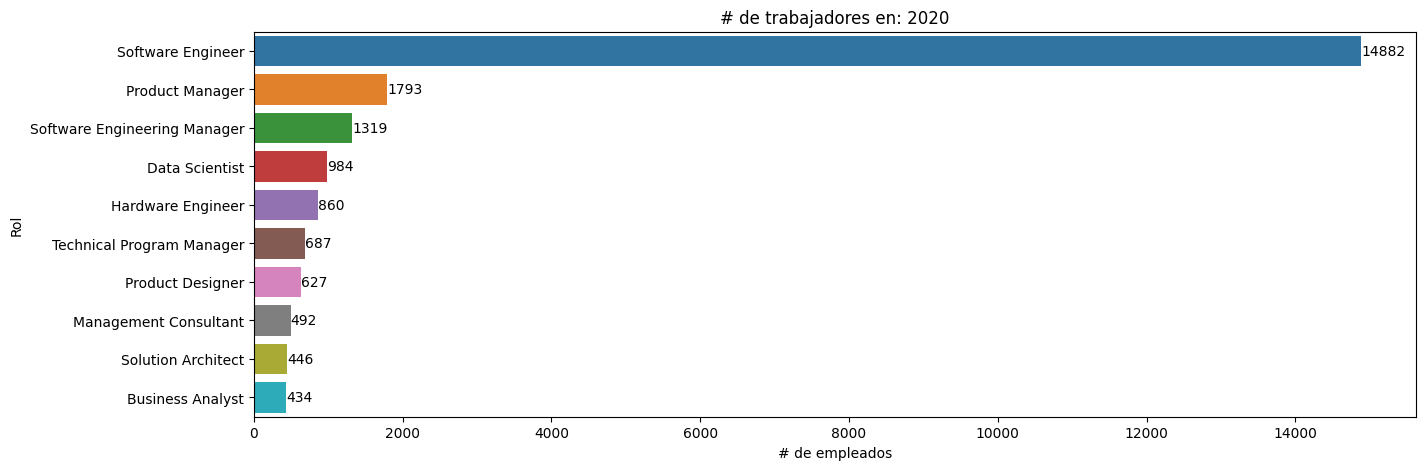

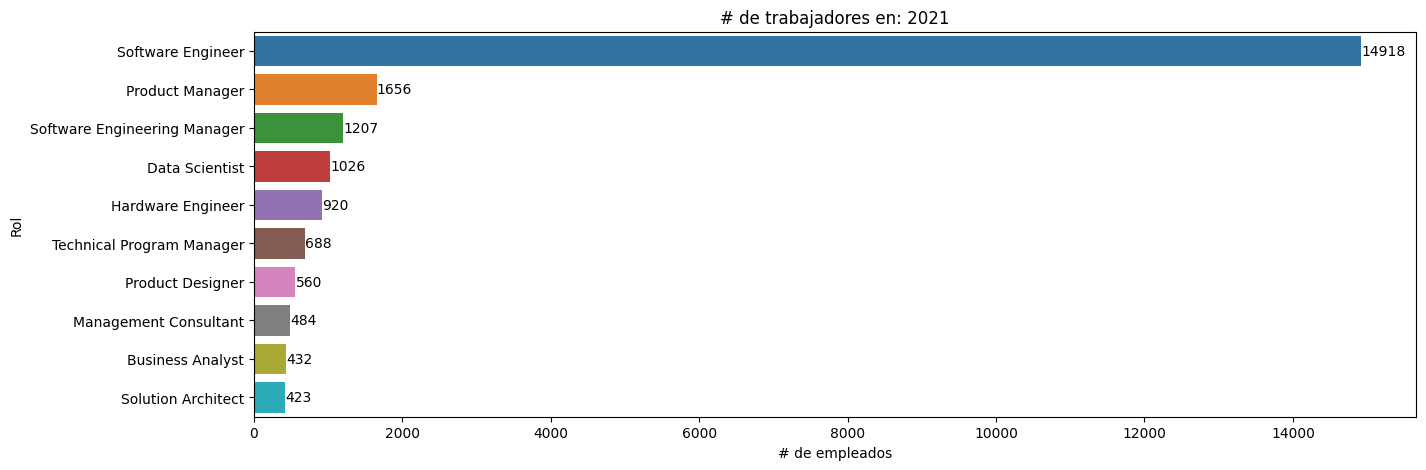

In [11]:
# Gráfico de cantidad de personal enroladas por titulo

for year in [2020, 2021]:
    
    plt.figure(figsize=(15,5))
    ax = sns.barplot(
                    x = df[df['year']==year]['title'].value_counts().nlargest(10).values,
                    y = df[df['year']==year]["title"].value_counts().nlargest(10).index
    )
    ax.set(xlabel='# de empleados', ylabel='Rol', title = f'# de trabajadores en: {year}')
    plt.bar_label(ax.containers[0], size=10)
    plt.tight_layout

*Observacion: Como podemos apreciar de la tabla y de las gráficas, el rol de 'Software Engineer' es el que más empleados tiene con un 62.2% del total de empleados para el 2020 y con un 63.8% para el 2021, lo cual reprensenta un incremento 1.6 puntos en el número de empleados*

### **Análisis de salario por genero**

In [12]:
# Tipos de generos

df_aux =df[(df['gender'] != "Sin dato" ) & (df['gender'] != "Desconocido" )] 
df_aux['gender'].value_counts()

gender
Male      35643
Female     6985
Other       397
Name: count, dtype: int64

In [13]:
# Tabla de salarios por genero para el 2020 y 2021 

salario_famele_2020 = df_aux[(df_aux['year']==2020) & (df_aux['gender']=='Female')]['totalyearlycompensation'].describe()
salario_male_2020 = df_aux[(df_aux['year']==2020) & (df_aux['gender']=='Male')]['totalyearlycompensation'].describe()
salario_famele_2021 = df_aux[(df_aux['year']==2021) & (df_aux['gender']=='Female')]['totalyearlycompensation'].describe()
salario_male_2021 = df_aux[(df_aux['year']==2021) & (df_aux['gender']=='Male')]['totalyearlycompensation'].describe()

dic = {'salario_famele_2020': salario_famele_2020,
       'salario_male_2020' : salario_male_2020,
       'salario_famele_2021' : salario_famele_2021,
       'salario_male_2021' : salario_male_2021}

pd.options.display.float_format = '{:.2f}'.format

SalarioXgenero_2020_2021 = pd.DataFrame(dic)
SalarioXgenero_2020_2021.T

,count,mean,std,min,25%,50%,75%,max
salario_famele_2020,2870.00,190567.60,100203.70,10000.00,130000.00,175000.00,228000.00,1355000.00
salario_male_2020,13544.00,211842.37,129185.07,10000.00,132000.00,186000.00,260000.00,2000000.00
salario_famele_2021,2831.00,191829.74,108943.59,10000.00,125000.00,171000.00,231000.00,1605000.00
salario_male_2021,12958.00,199086.66,145905.51,10000.00,112000.00,172000.00,250000.00,4980000.00


In [14]:
# Tabla sobre la discrepancia salarial para hombres y mujeres del 2020 y 2021

df_male = df_aux[((df_aux['year'] == 2020) | (df_aux['year'] == 2021))&(df_aux['gender'] == 'Male')]
df_female = df_aux[((df_aux['year'] == 2020) | (df_aux['year'] == 2021))&(df_aux['gender'] == 'Female')]
dic = {'Salary Male': df_male.groupby('year')['totalyearlycompensation'].mean(),
       'Salary Female': df_female.groupby('year')['totalyearlycompensation'].mean(),
       } 
compansacionXgenero_df = pd.DataFrame(dic)

compansacionXgenero_df

,Salary Male,Salary Female
year,,
2020,211842.37,190567.60
2021,199086.66,191829.74


In [15]:
# Tasa de crecieminto salarial anual  para hombre y mujeres

rate_grow_Male = round((compansacionXgenero_df.loc[2021,'Salary Male']-compansacionXgenero_df.loc[2020,'Salary Male'])/compansacionXgenero_df.loc[2021,'Salary Male']*100,2)
rate_grow_Female = round((compansacionXgenero_df.loc[2021,'Salary Female']-compansacionXgenero_df.loc[2020,'Salary Female'])/compansacionXgenero_df.loc[2021,'Salary Female']*100, 2)
print(f"Hombres: {rate_grow_Male}%")
print(f"Mujeres: {rate_grow_Female}%")

Hombres: -6.41%
Mujeres: 0.66%


Text(0, 0.5, 'Compensación Promedio')

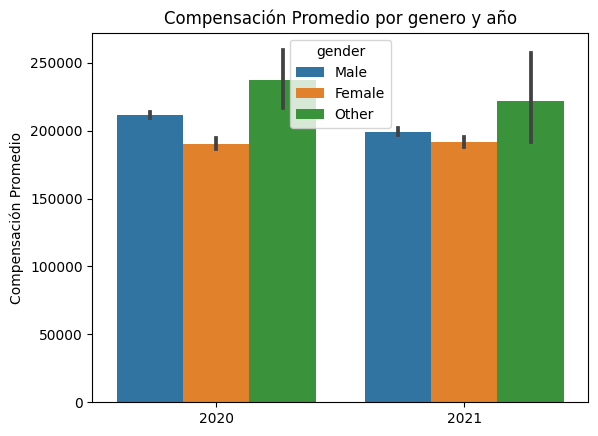

In [16]:
# Gráfico de compensación media por genero para los años 2020 y 2021

df_2020_2021 = df_aux[(df_aux['year'] == 2020) | (df_aux['year'] == 2021)]
brlp = sns.barplot(df_2020_2021, x="year", y="totalyearlycompensation", hue="gender",estimator=np.mean)
plt.title('Compensación Promedio por genero y año')
plt.xlabel('')
plt.ylabel('Compensación Promedio')
#brlp.bar_label(brlp.containers[0], size=8)

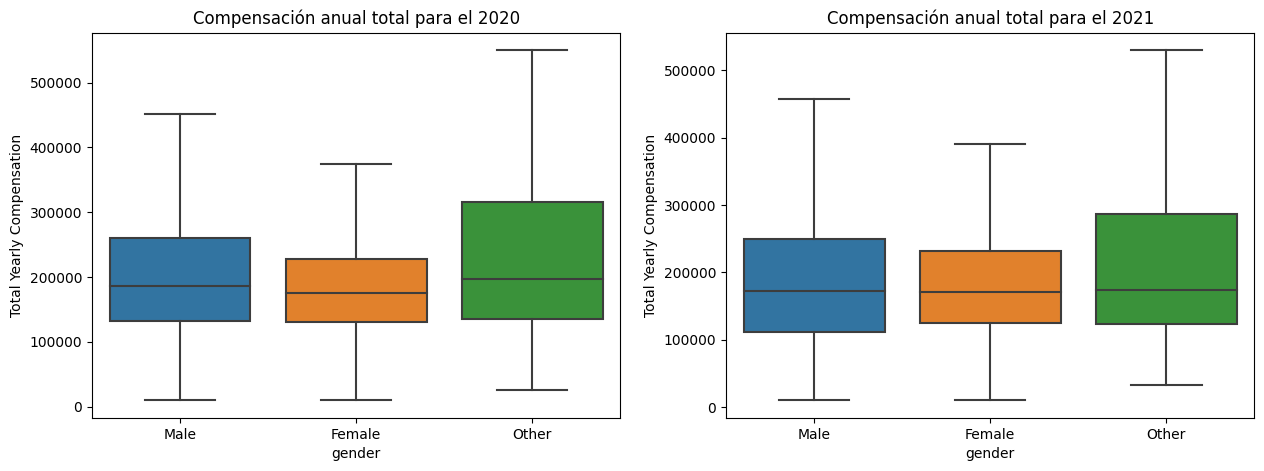

In [17]:
# Gráfico de caja y bigote para salario anual total por genero
year = [2020, 2021]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.subplots_adjust(hspace=.25)

for i, año in enumerate(year):
    bplt = sns.boxplot(data = df_aux[df_aux['year']==año],
           x='gender',
           y='totalyearlycompensation',
           showfliers=False, ax=ax[i])
    bplt.set_ylabel('Total Yearly Compensation')
    bplt.set_title(f"Compensación anual total para el {año}")


*Observación: La tabla y los gráficos mostrados arriba hechan de ver que la compensación promedio anual es mayor para el genero masculino que para el femenino, del 2020 al 2021 la tasa de crecimiento salarial para el genero hombre y mujer fue de un decremento de -6.41% y un incremento de 0.66% para el genero hombre y mujer respectivamente*  

Nota: El propósito del Ph. D. in Informática es proporcionar a los estudiantes que califican una comprensión profunda y un conocimiento integrado de la teoría aplicable avanzada en el campo de la informática.

# **Análisis de salarios por país**

In [21]:
df.groupby('country')['totalyearlycompensation'].mean().sort_values(ascending=False).to_frame()

,totalyearlycompensation
country,
Switzerland,251663.10
United States,235464.85
Saudi Arabia,199750.00
Marshall Islands,195000.00
United Arab Emirates,189066.67
...,...
Nigeria,23142.86
Pakistan,22000.00
Burma,15000.00


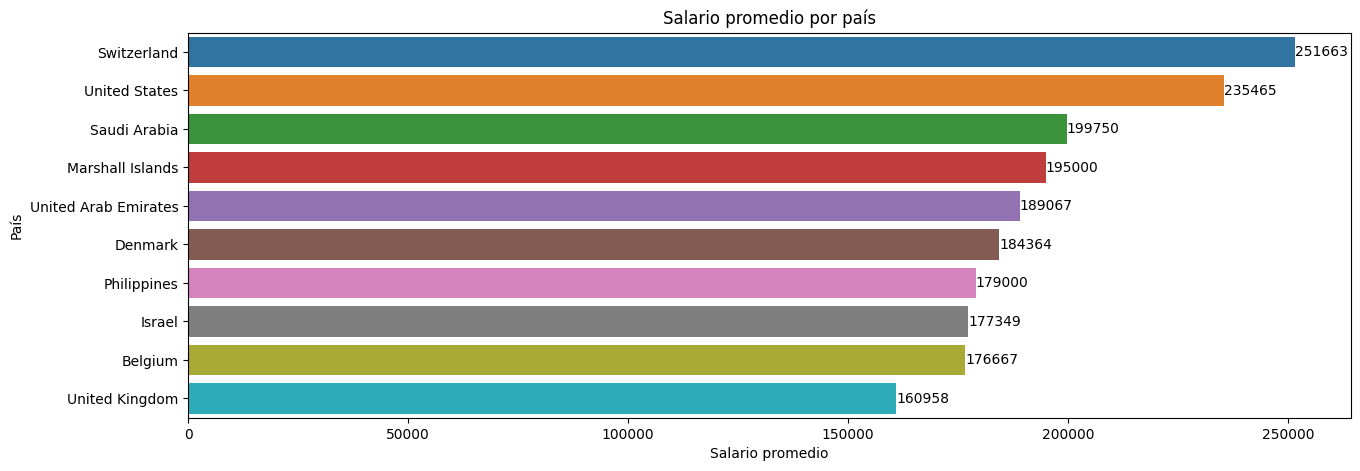

In [22]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x=df.groupby('country')['totalyearlycompensation'].mean().nlargest(10).sort_values(ascending=False).values,
            y=df.groupby('country')['totalyearlycompensation'].mean().nlargest(10).sort_values(ascending=False).index)

ax.set(xlabel='Salario promedio', ylabel='País', title = 'Salario promedio por país')
plt.bar_label(ax.containers[0], size=10)
plt.tight_layout
plt.show()

*Observacion: Switzerland, United States y Saudi Arabia está, dentro del top 3 de los paises que tienen mejor remuneración en promedio de sus empleados*

In [23]:
df.columns

Index(['year', 'company', 'level', 'title', 'totalyearlycompensation',
       'yearsofexperience', 'yearsatcompany', 'bonus', 'gender', 'Race',
       'Education', 'city', 'country', 'es_faang'],
      dtype='object')

# **Análisis de salarios por raza**

In [24]:
df.groupby('Race')['totalyearlycompensation'].mean().sort_values(ascending=False).to_frame()

,totalyearlycompensation
Race,
Desconocido,226680.18
White,206559.90
Two Or More,204777.78
Asian,193288.92
Hispanic,189846.36
Black,181324.64


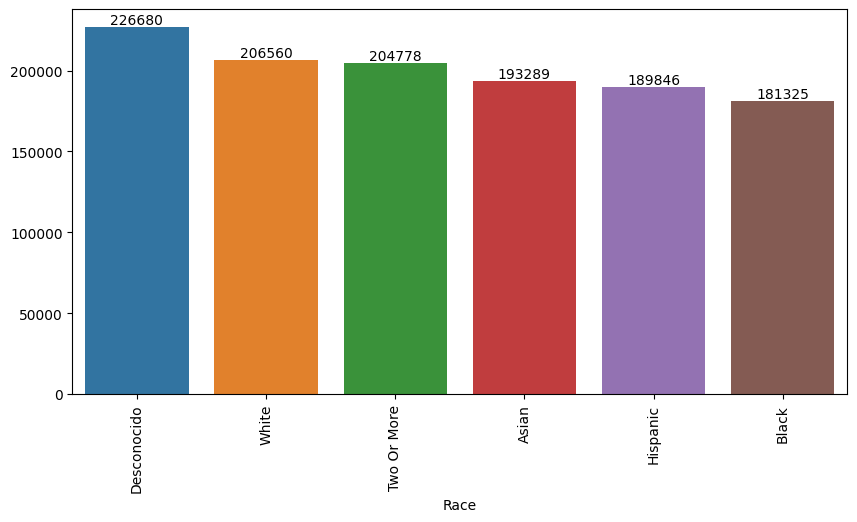

In [25]:
plt.figure(figsize=(10,5))
ax = sns.barplot(y = df.groupby('Race')['totalyearlycompensation'].mean().nlargest(10).sort_values(ascending=False).values,
                 x=df.groupby('Race')['totalyearlycompensation'].mean().nlargest(10).sort_values(ascending=False).index)
#ax.set(xlabel='Salario promedio', ylabel='País', title = 'Salario promedio por país')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
#ax.xlabel('Salario promedio',rotation=90)
plt.bar_label(ax.containers[0], size=10)
plt.tight_layout
plt.show()

***observación**: Como podemos apreciar del gráfico la raza blanca es mejor pagada que la raza negra, sin embargo no el salrio y las diferentes razas no presentan una correlación de relevancia*

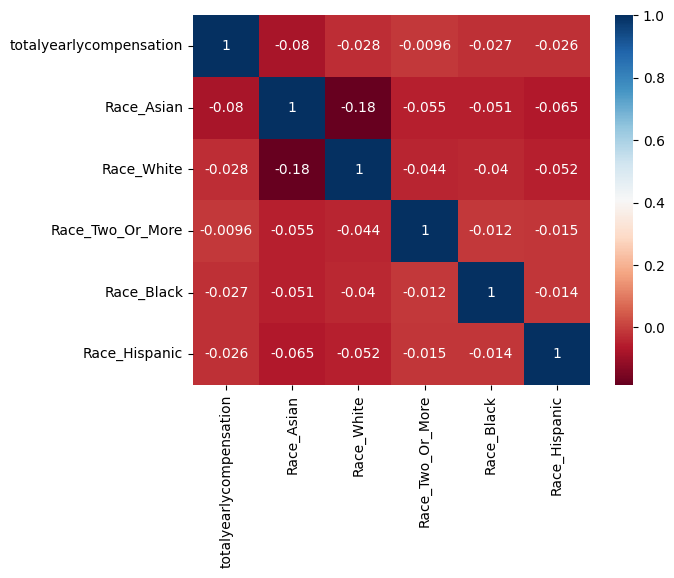

In [38]:
full_df = pd.read_csv('salario_data.csv')
razas_df = full_df[['totalyearlycompensation','Race_Asian', 'Race_White', 'Race_Two_Or_More',
       'Race_Black', 'Race_Hispanic']]
sns.heatmap(razas_df.corr(), cmap='RdBu', annot=True)
plt.show()

# **Análisis basado en FAANGS**

**Vamos a comparar los diferentes cargos para sujetos con más de 5 años de experiencia (senior) en los Estados Unidos en la categoría de ser o no pertenecientes a las empresas FAANGS**

In [27]:
# Filtramos el dataframe para los EU con experiencia mayor a 5 años 
senior_df = df[(df['yearsofexperience']>5) & (df['country']=='United States')]
mean_salary_by_title = senior_df.groupby(['title', 'es_faang'])['totalyearlycompensation'].mean().reset_index()
mean_salary_by_title.head(10)

,title,es_faang,totalyearlycompensation
0,Business Analyst,0,171389.16
1,Business Analyst,1,208285.71
2,Data Scientist,0,251136.27
3,Data Scientist,1,319191.67
4,Hardware Engineer,0,245069.83
5,Hardware Engineer,1,319161.47
6,Human Resources,0,208740.51
7,Human Resources,1,238938.27
8,Management Consultant,0,201968.25
9,Management Consultant,1,316086.96


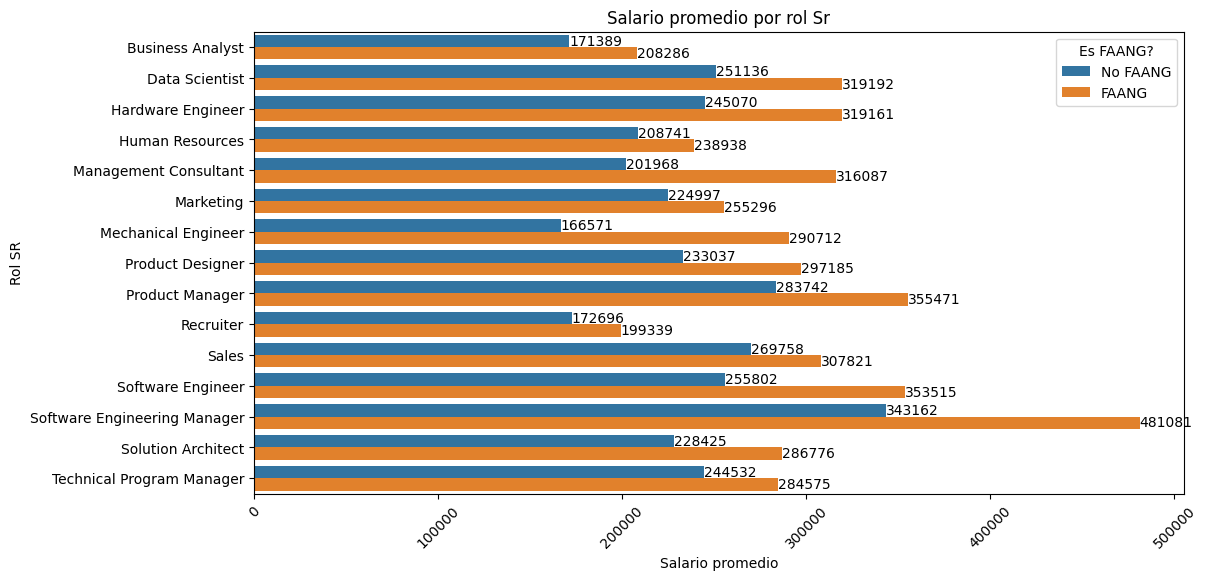

In [29]:
# Plot the bar plot with a hue
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='totalyearlycompensation', y='title', hue='es_faang', data=mean_salary_by_title)

# Customize the plot
ax.set(xlabel='Salario promedio', ylabel='Rol SR', title = 'Salario promedio por rol Sr')
plt.xticks(rotation=45)
plt.bar_label(ax.containers[0], size=10)
plt.bar_label(ax.containers[1], size=10)
plt.tight_layout

# Change legends HUE
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['No FAANG', 'FAANG'], title='Es FAANG?')

# Display the plot
plt.show()


***Observación**: En todos los roles se observa que las empresas FAANGS presentan mejores salarios que las que no son pertenecientes a esta.**

### **Analicemos las correlación entre las diferentes variables numéricas**

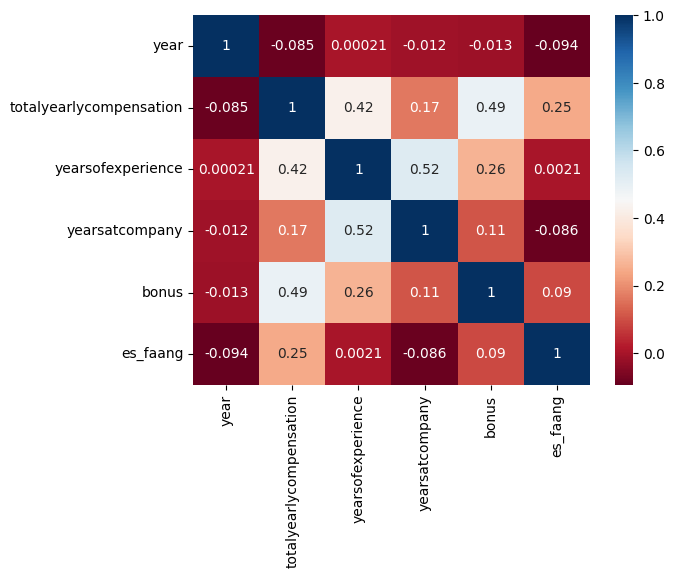

In [25]:
# Correlación para todas las companias 

df_aux = df[['year','totalyearlycompensation','yearsofexperience','yearsatcompany','bonus','es_faang']]
#df_aux
sns.heatmap(df_aux.corr(), cmap='RdBu', annot=True)
plt.show()

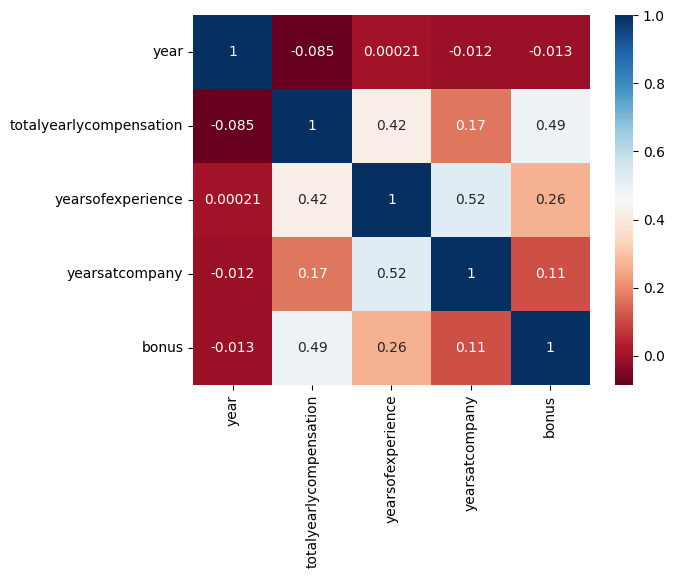

In [27]:
# Correlación para las empresas FAANGS

df_aux_faang = df[df['es_faang']==1]
df_aux_faang = df[['year','totalyearlycompensation','yearsofexperience','yearsatcompany','bonus']]

sns.heatmap(df_aux_faang.corr(), cmap='RdBu', annot=True)
plt.show()

**Correlación de 0.49 para las variables de la compensación anual promedio y los bonos**

**Coorelacion de 0.52 entre los años en la compania y los años de experiencia**

**Coorelación de 0.42 entre los años de experiencia y la compensación promedio anual**

### **Correlación entre compensación anual promedio y la eduacación**

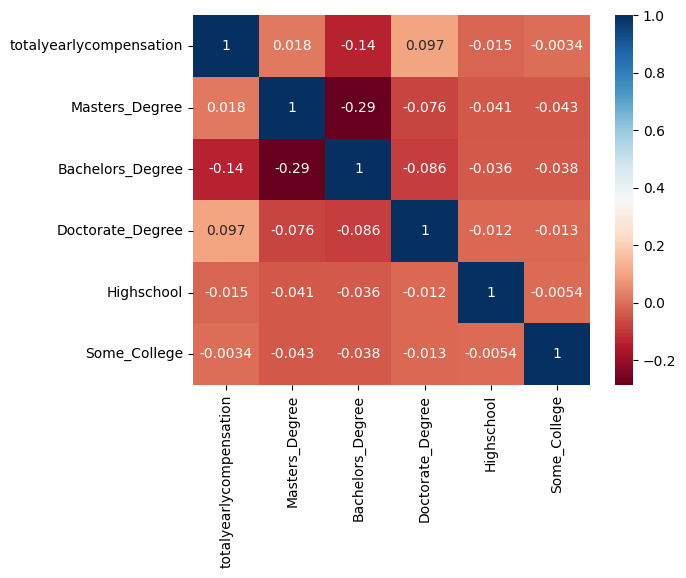

In [32]:
# Correlación entre estudios y compensación anual promedio

full_df = pd.read_csv('salario_data.csv')
study_df = full_df[['totalyearlycompensation','Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College']]

sns.heatmap(study_df.corr(), cmap='RdBu', annot=True)
plt.show()

**No hay correlación de relevancia entre los diferentes niveles de educación y el salario, sin embargo las personas con estudio del tipo phD persiven un mayor ingreso que el resto como se puede apreciar en la siguiente gráfica**

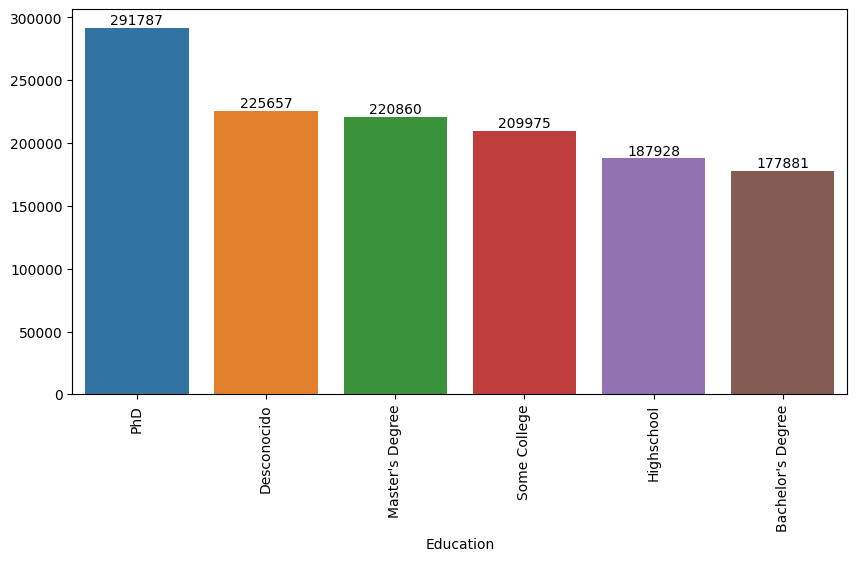

In [34]:
plt.figure(figsize=(10,5))
ax = sns.barplot(y = df.groupby('Education')['totalyearlycompensation'].mean().nlargest(10).sort_values(ascending=False).values,
                 x=df.groupby('Education')['totalyearlycompensation'].mean().nlargest(10).sort_values(ascending=False).index)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.bar_label(ax.containers[0], size=10)
plt.tight_layout
plt.show()

### **Observaciones**
**Análsis por cantidad de empleados:**

* Contamos con más empleados para Software Engineer.

* Más empleados del genero masculino 82.84% que femenino 16.23%.

* Predominancia de las razas blanca 35.79% y asiática 52.5%.

* Más gente con etudios de Master's Degree 24.56% y Bachelor's Degree 20.12%.

**Análisis por salarios:**

* Software Engineering Manager persiven ingresos(65%) muy por encima del resto de roles.

* Por genero se tiene que los masculinos persiven mejores ingresos que el género femenino.

* Switzerland, United States y Saudi Arabia son el top tres de los paises con mejores salarios.

* La raza blaca es la mejor pagada y la negra la menos favorecida.

En cuanto al salario promedio para los diferentes roles para las empresas que son FAANGS 
se observa que los empleados persiven mejores salrios que para las empresas que no son FAANS.

Existe una coorelacion de 0.42 entre los años de experiencia y el salario y una de .49 para los
bonos y la compensación anual.

No encontramos ninguna coorelación de importancia entre los grados educativos y el salario persivido.